# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load .env enviroment variables
path = os.path.join(os.getcwd(),".env")
path = os.path.normpath(path)
from dotenv import load_dotenv
load_dotenv(path)

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['CAD']['price']
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43821.41
The current value of your 5.3 ETH is $12478.91


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [8]:
# Format current date as ISO format
today = pd.Timestamp('2023-06-15', tz='America/New_York').isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_bars(
    tickers,
    timeframe,
    start = today
).df
# Reorganize the DataFrame
# Separate ticker data
df_agg = df_investments.loc[df_investments['symbol'] == 'AGG']
df_spy = df_investments.loc[df_investments['symbol'] == 'SPY']

# Concatenate the ticker DataFrames
df_concatenated = pd.concat([df_agg, df_spy],axis=1, keys=['AGG', 'SPY'],join='inner')

# Preview DataFrame
df_concatenated.head()

AGG                                               \
                            open    high      low  close   volume trade_count   
timestamp                                                                       
2023-06-15 04:00:00+00:00  98.29  98.460  98.1337  98.45  7471994       29262   
2023-06-16 04:00:00+00:00  98.09  98.275  97.9050  98.14  4599777       26718   

                                                SPY                            \
                                vwap symbol    open      high     low   close   
timestamp                                                                       
2023-06-15 04:00:00+00:00  98.355119    AGG  436.33  443.9000  436.23  442.60   
2023-06-16 04:00:00+00:00  98.118495    AGG  443.02  443.6078  438.97  439.46   

                                                                     
                              volume trade_count        vwap symbol  
timestamp                                                            
2023-06-15 04:00:00+00:00  110301302      748180  440.705812    SPY  
2023-06-16 04:00:00+00:00  110461387      619074  440.999282    SPY

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_agg['close'].iloc[-1]
spy_close_price = df_spy['close'].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.14
Current SPY closing price: $439.46


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21973.00
The current value of your 200 AGG shares is $19628.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value 
shares_value = my_spy_value + my_agg_value 

# Create savings DataFrame
data = {'amount': [crypto_value, shares_value]}
df_savings = pd.DataFrame(data, index=['crypto', 'shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,56300.316858
shares,41601.000000


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

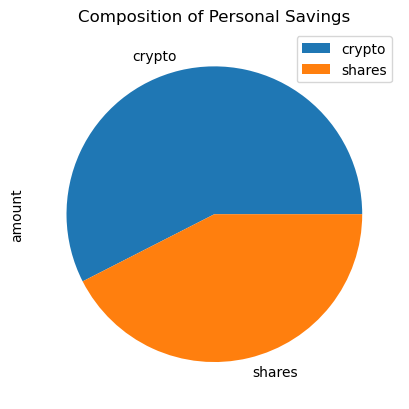

In [12]:
# Plot savings pie chart
df_savings.plot(kind='pie', y='amount', title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal.")
else:
    savings_shortfall = emergency_fund - total_savings
    print(f"You are ${savings_shortfall} away from reaching your financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-06-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-06-15', tz='America/New_York').isoformat()
timeframe = "1Day"


In [15]:
# Get 5 years' worth of historical data for SPY and AGG


df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data


df_agg_5yrs = df_stock_data.loc[df_stock_data['symbol'] == 'AGG']
df_spy_5yrs = df_stock_data.loc[df_stock_data['symbol'] == 'SPY']

# Concatenate the ticker DataFrames
df_concatenated_5yrs = pd.concat([df_agg_5yrs, df_spy_5yrs],axis=1,keys=['AGG', 'SPY'],join='inner')


# Preview DataFrame
df_concatenated_5yrs.head()



AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2018-06-15 04:00:00+00:00  106.01  106.0890  105.86  105.880  2361854   
2018-06-18 04:00:00+00:00  105.93  105.9300  105.80  105.900  2359452   
2018-06-19 04:00:00+00:00  106.05  106.1100  105.98  106.010  2184239   
2018-06-20 04:00:00+00:00  106.06  106.0600  105.79  105.805  2403650   
2018-06-21 04:00:00+00:00  105.88  105.9599  105.81  105.840  2896731   

                                                             SPY          \
                          trade_count        vwap symbol    open    high   
timestamp                                                                  
2018-06-15 04:00:00+00:00       12759  105.936682    AGG  276.61  277.51   
2018-06-18 04:00:00+00:00       10590  105.864382    AGG  275.49  276.70   
2018-06-19 04:00:00+00:00       10342  106.041881    AGG  274.00  275.75   
2018-06-20 04:00:00+00:00        9220  105.886127    AGG  276.26  276.72   
2018-06-21 04:00:00+00:00       11286  105.870603    AGG  275.96  275.98   

                                                                              \
                              low   close     volume trade_count        vwap   
timestamp                                                                      
2018-06-15 04:00:00+00:00  275.35  277.03  120673012      305807  276.757012   
2018-06-18 04:00:00+00:00  274.95  276.59   53163695      221103  276.151288   
2018-06-19 04:00:00+00:00  273.53  275.48   97669710      337433  274.931757   
2018-06-20 04:00:00+00:00  275.59  276.01   54051558      212283  276.065730   
2018-06-21 04:00:00+00:00  273.68  274.24   75659252      289344  274.618337   

                                  
                          symbol  
timestamp                         
2018-06-15 04:00:00+00:00    SPY  
2018-06-18 04:00:00+00:00    SPY  
2018-06-19 04:00:00+00:00    SPY  
2018-06-20 04:00:00+00:00    SPY  
2018-06-21 04:00:00+00:00    SPY

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

# Set the portfolio weights (60% SPY; 40% AGG)
weights = [0.6, 0.4]

# Create the MCSimulation object
MC_sim = MCSimulation(
    portfolio_data = df_concatenated_5yrs,  # This is your DataFrame with stock data
    weights = weights,  # Portfolio distribution
    num_simulation = 500,  # Number of simulations
    num_trading_days = 252*30  # Trading days over 30 years
)


In [17]:
# Printing the simulation input data
MC_sim.portfolio_data.head()

AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2018-06-15 04:00:00+00:00  106.01  106.0890  105.86  105.880  2361854   
2018-06-18 04:00:00+00:00  105.93  105.9300  105.80  105.900  2359452   
2018-06-19 04:00:00+00:00  106.05  106.1100  105.98  106.010  2184239   
2018-06-20 04:00:00+00:00  106.06  106.0600  105.79  105.805  2403650   
2018-06-21 04:00:00+00:00  105.88  105.9599  105.81  105.840  2896731   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2018-06-15 04:00:00+00:00       12759  105.936682    AGG          NaN  276.61   
2018-06-18 04:00:00+00:00       10590  105.864382    AGG     0.000189  275.49   
2018-06-19 04:00:00+00:00       10342  106.041881    AGG     0.001039  274.00   
2018-06-20 04:00:00+00:00        9220  105.886127    AGG    -0.001934  276.26   
2018-06-21 04:00:00+00:00       11286  105.870603    AGG     0.000331  275.96   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2018-06-15 04:00:00+00:00  277.51  275.35  277.03  120673012      305807   
2018-06-18 04:00:00+00:00  276.70  274.95  276.59   53163695      221103   
2018-06-19 04:00:00+00:00  275.75  273.53  275.48   97669710      337433   
2018-06-20 04:00:00+00:00  276.72  275.59  276.01   54051558      212283   
2018-06-21 04:00:00+00:00  275.98  273.68  274.24   75659252      289344   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2018-06-15 04:00:00+00:00  276.757012    SPY          NaN  
2018-06-18 04:00:00+00:00  276.151288    SPY    -0.001588  
2018-06-19 04:00:00+00:00  274.931757    SPY    -0.004013  
2018-06-20 04:00:00+00:00  276.065730    SPY     0.001924  
2018-06-21 04:00:00+00:00  274.618337    SPY    -0.006413

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006332,1.005488,0.993422,1.008168,1.006538,0.998590,1.003177,1.005198,0.984988,1.013724,...,1.001730,1.001572,1.006929,1.000437,1.002227,0.997128,1.003131,1.008435,1.012007,1.005613
2,1.002866,1.013242,0.988671,1.008757,1.004471,1.009178,1.002177,1.012888,0.982964,1.015111,...,1.000818,1.007229,1.004337,1.001078,0.994864,0.998662,1.004992,0.999684,1.006994,1.002052
3,0.998207,1.017740,1.005811,1.012430,1.006442,1.015207,0.999298,1.005129,0.991008,1.009106,...,1.004299,1.006947,0.997004,1.001423,0.999505,0.996533,1.008547,1.000390,1.009359,1.004709
4,0.990511,1.010885,1.004206,1.016521,1.004891,1.016837,0.989985,1.002271,0.987215,1.007953,...,1.000943,1.009812,1.002840,0.993660,1.007690,0.988869,1.002910,1.005645,1.016914,1.000861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.380591,8.618502,1.822120,3.145948,7.960765,5.474562,6.767512,3.661405,3.513441,0.814422,...,5.837856,6.478201,3.043991,3.283801,1.277017,3.423066,1.384932,4.223072,3.775604,3.402328
7557,1.371443,8.634350,1.821454,3.121071,7.956278,5.424946,6.765907,3.685554,3.459002,0.816455,...,5.839581,6.535640,3.013936,3.312650,1.274849,3.417105,1.383441,4.261419,3.759154,3.404297
7558,1.376002,8.632899,1.824687,3.116329,7.997803,5.390117,6.808599,3.719047,3.466596,0.819056,...,5.803174,6.542073,2.973017,3.328454,1.291635,3.443632,1.379611,4.227006,3.800352,3.419946
7559,1.372888,8.713024,1.815464,3.121123,7.967978,5.365890,6.784348,3.715742,3.459413,0.822407,...,5.832945,6.496382,2.951050,3.306205,1.293386,3.443842,1.374382,4.227091,3.797251,3.421878


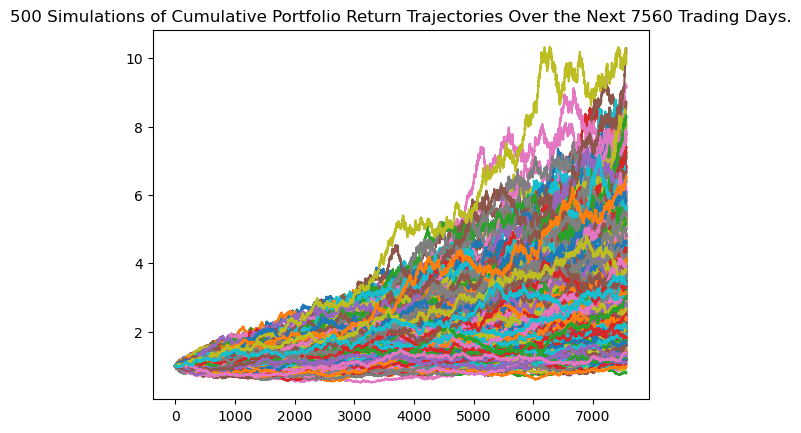

In [19]:
# Plot simulation outcomes
line_plot = MC_sim.plot_simulation()

# Display the plot
plt.show()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

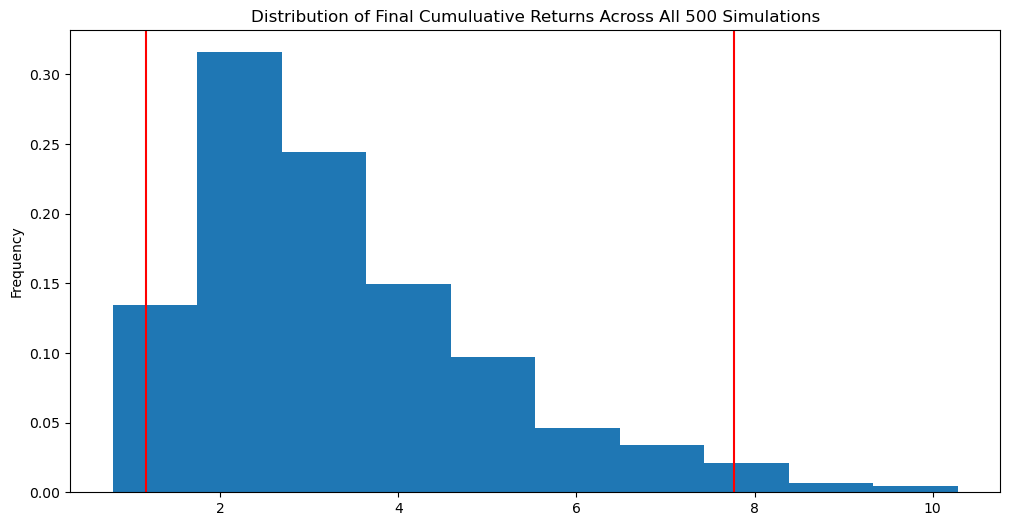

In [20]:
# Plot probability distribution and confidence intervals
plt.figure(figsize=(12, 6))
MC_sim.plot_distribution()


### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_sim.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)


count           500.000000
mean              3.336598
std               1.684788
min               0.789302
25%               2.063971
50%               2.994470
75%               4.197119
max              10.285415
95% CI Lower      1.164029
95% CI Upper      7.772587
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Calculate the percentile values for the lower and upper confidence intervals
ci_lower = round(summary_stats[8]*10000,2)
ci_upper = round(summary_stats[9]*10000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower:.2f} and ${ci_upper:.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $11640.29 and $77725.87


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_increase = ci_lower * 1.5
ci_upper_increase = ci_upper * 1.5
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $11640.29 and $77725.87


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

# Set the portfolio weights (60% SPY; 40% AGG)
weights = [0.6, 0.4]

# Create the MCSimulation object
MC_sim_5years = MCSimulation(
    portfolio_data = df_concatenated_5yrs,  # This is your DataFrame with stock data
    weights = weights,  # Portfolio distribution
    num_simulation = 1000,  # Number of simulations
    num_trading_days = 252*5  # Trading days over 30 years
)
MC_sim_5years.portfolio_data.head()


AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2018-06-15 04:00:00+00:00  106.01  106.0890  105.86  105.880  2361854   
2018-06-18 04:00:00+00:00  105.93  105.9300  105.80  105.900  2359452   
2018-06-19 04:00:00+00:00  106.05  106.1100  105.98  106.010  2184239   
2018-06-20 04:00:00+00:00  106.06  106.0600  105.79  105.805  2403650   
2018-06-21 04:00:00+00:00  105.88  105.9599  105.81  105.840  2896731   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2018-06-15 04:00:00+00:00       12759  105.936682    AGG          NaN  276.61   
2018-06-18 04:00:00+00:00       10590  105.864382    AGG     0.000189  275.49   
2018-06-19 04:00:00+00:00       10342  106.041881    AGG     0.001039  274.00   
2018-06-20 04:00:00+00:00        9220  105.886127    AGG    -0.001934  276.26   
2018-06-21 04:00:00+00:00       11286  105.870603    AGG     0.000331  275.96   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2018-06-15 04:00:00+00:00  277.51  275.35  277.03  120673012      305807   
2018-06-18 04:00:00+00:00  276.70  274.95  276.59   53163695      221103   
2018-06-19 04:00:00+00:00  275.75  273.53  275.48   97669710      337433   
2018-06-20 04:00:00+00:00  276.72  275.59  276.01   54051558      212283   
2018-06-21 04:00:00+00:00  275.98  273.68  274.24   75659252      289344   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2018-06-15 04:00:00+00:00  276.757012    SPY          NaN  
2018-06-18 04:00:00+00:00  276.151288    SPY    -0.001588  
2018-06-19 04:00:00+00:00  274.931757    SPY    -0.004013  
2018-06-20 04:00:00+00:00  276.065730    SPY     0.001924  
2018-06-21 04:00:00+00:00  274.618337    SPY    -0.006413

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_sim_5years.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998260,1.004440,1.015582,1.010710,0.992704,0.997542,1.000872,1.006894,1.000714,0.994810,...,0.995891,1.000274,0.994526,0.993282,1.000996,0.981446,1.015220,1.000042,0.998390,1.004114
2,0.991179,1.007985,1.014673,1.015503,1.014257,1.005041,1.007711,1.008766,1.008877,0.988773,...,0.984385,0.994051,0.993069,0.993274,1.002611,0.981641,1.019459,1.001111,0.994551,1.001077
3,0.994224,1.009585,1.012476,1.012041,1.016817,0.999251,1.003624,0.999323,1.014315,0.984796,...,0.984184,0.988637,0.995400,0.994121,1.001334,0.979218,1.027460,1.008174,0.997342,1.006337
4,0.999347,1.014444,1.006693,1.002881,1.019918,1.012061,1.003865,0.999376,1.014821,0.977805,...,0.988553,0.997490,0.995611,0.988292,1.013487,0.977437,1.023210,1.000971,1.002172,1.010478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.683361,1.557428,1.695835,0.976893,1.535352,0.881984,1.239957,1.108155,1.372602,1.498145,...,1.277141,1.341907,1.278705,1.442481,0.939320,1.232128,1.373839,1.642554,1.070126,0.942381
1257,1.691047,1.565518,1.694373,0.979155,1.518422,0.890413,1.241351,1.113877,1.383480,1.501176,...,1.263267,1.349052,1.279383,1.455844,0.941579,1.226784,1.372740,1.642772,1.065648,0.943647
1258,1.680640,1.564235,1.684367,0.982777,1.522007,0.886811,1.246122,1.112664,1.368457,1.507752,...,1.262156,1.357904,1.275790,1.440203,0.934621,1.229749,1.363998,1.656649,1.068571,0.946544
1259,1.673899,1.555485,1.677902,0.977191,1.524635,0.896690,1.252757,1.125125,1.376237,1.513947,...,1.262856,1.358706,1.279500,1.435412,0.932450,1.220013,1.369873,1.660975,1.069204,0.954344


In [ ]:
# Plot simulation outcomes
# Plot simulation outcomes
line_plot = MC_sim_5years.plot_simulation()

# Display the plot
plt.show()

In [ ]:
# Plot probability distribution and confidence intervals
plt.figure(figsize=(12, 6))
MC_sim_5years.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_5years = MC_sim_5years.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_5years)

In [ ]:
# Set initial investment
initial_investment = 20000

# Calculate the percentile values for the lower and upper confidence intervals
ci_lower_five = round(summary_stats_5years[8]*10000,2)
ci_upper_five = round(summary_stats_5years[9]*10000,2)



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")